In [3]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
SAMPLE_SET_SIZE = 200;

mu = [0, 1, 0, 1]
variance = [1, 2, 1, 2]
uniform_rands = [np.zeros(4)]*4

for i in range(4):
    uniform_rands[i] = np.random.normal(mu[i], variance[i], int(SAMPLE_SET_SIZE/2)) 

    
headers = "x1 x2 class".split()
class1 = pd.DataFrame({'x1': uniform_rands[0], 'x2': uniform_rands[2], 
                      'class': 'w1'}, columns=headers)
class2 = pd.DataFrame({'x1': uniform_rands[1], 'x2': uniform_rands[3], 
                      'class': 'w2'}, columns=headers)
class2.index=class2.index+int(SAMPLE_SET_SIZE/2)

sample_set = pd.concat([class1, class2])

In [5]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)


In [31]:
X_mine = training_set.iloc[0:201, [0,1]].values
omega = training_set.iloc[0:201, 2].values
X_mine

array([[ 0.4862196 , -0.28539222],
       [ 0.65550285,  1.67013731],
       [ 0.37466748, -0.33551759],
       [-0.01747281, -0.44822855],
       [-1.20475981,  0.57842341],
       [-0.85104578,  0.52867731],
       [-0.212203  , -0.28437805],
       [-0.03629869,  0.31774676],
       [ 0.76450347, -0.8139443 ],
       [ 0.29402399, -2.33593927],
       [ 1.62425196,  0.15311834],
       [ 0.59116353,  0.46168645],
       [-0.01401038, -0.75345391],
       [-0.99048355,  0.09906565],
       [-1.03729473, -0.68748866],
       [ 0.30908245, -0.45535758],
       [ 1.1576872 , -0.32662193],
       [ 0.06936977, -0.52203702],
       [ 0.13878652,  0.80574204],
       [ 0.26621069,  0.44435543],
       [-1.90945016,  2.20971903],
       [-1.3104824 , -1.84125577],
       [-0.48161478,  0.10632778],
       [-0.88469236,  0.40848978],
       [ 1.6211421 ,  1.04978808],
       [-1.11177545, -0.31375059],
       [ 1.26380487, -0.82104383],
       [ 1.08723883, -0.20797283],
       [-0.37438329,

In [83]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.misclass1 = 0
        self.misclass2 = 0
        
        for _ in range(self.epochs):
            errors = 0
            
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                
                if(update != 0.0 and target == 1):
                    self.w_[1:] +=  update * xi
                    self.w_[0] +=  update
                    self.misclass1 += 1

                else if (update != 0.0 and target == 2):
                    self.w_[1:] +=  update * xi  * 0.01
                    self.w_[0] +=  update * 0.01
                    self.misclass2 += 1
                    
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

SyntaxError: invalid syntax (<ipython-input-83-bbf341a61331>, line 27)

Weights: [ 0.282      -0.12397828 -0.11295047]


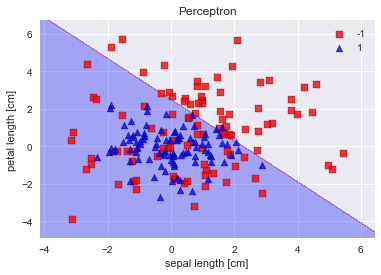

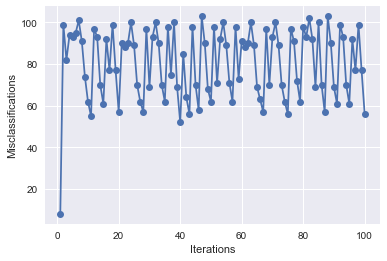

Guessed class 1 (1) wrong: 81, Guessed class 2 (-1) wrong: 19919


In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=100, eta=0.1)

ppn.train(X_mine, omega)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X_mine, omega, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

print("Guessed class 1 (1) wrong: {0}, Guessed class 2 (-1) wrong: {1}".format(ppn.misclass1, ppn.misclass2))

In [68]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

